
First we should import the necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn import metrics, preprocessing
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler

you can see a part of dataset by the code bellow


In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/cancer dataset.csv')
Data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


The ''preprocessing_the_data'' function consists of three main parts for preprocessing: in the first step i change the form of data to a numpy array then i separate the lables and features 
columns. one the second step i worked on lables and modify the value of lables from (1,2) to (0,1).in the third step i Normalize the features for improving the results.

In [ ]:
def preprocessing_the_data(Data):
  Data = np.array(Data)
  Class = Data[:, 9]
  Features = Data[:, 0:-1]
  lb = preprocessing.LabelBinarizer()
  Class = lb.fit_transform(Class)
  scalar = MinMaxScaler()
  data_scaled = scalar.fit_transform(Features)
####print(data_scaled)

  return Class,data_scaled






in this cell i split the data into three parts: 1- train 2- validation data  3- test data.......  totally 25 percentages of data is devoted to validation and test  and 75 percentages is for training the model

In [ ]:

Class,data_scaled= preprocessing_the_data(Data)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, Class, test_size=0.25, random_state=42, stratify=Class)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape :",X_test.shape)
print("y_test shape ",y_test.shape)

X_train shape :  (87, 9)
y_train shape :  (87, 1)
X_test shape : (14, 9)
y_test shape  (14, 1)


in the cell bellow we train the system using SVM algorithm ;after training the model,we can make predictions . also you can see a text report showing the main classification metrics for train data then you can obtain tarin data accuracy and loss


In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)

train_accuracy = classification_report(y_train, y_pred)
print('\n\n Train Report:\n',train_accuracy )

print("\n\n train Accuracy:",metrics.accuracy_score(y_train, y_pred))
train_loss = log_loss(y_train, y_pred)
print('\n\n Train Loss: %s.'%train_loss)




 Train Report:
               precision    recall  f1-score   support

           0       0.76      0.79      0.77        39
           1       0.83      0.79      0.81        48

    accuracy                           0.79        87
   macro avg       0.79      0.79      0.79        87
weighted avg       0.79      0.79      0.79        87



 train Accuracy: 0.7931034482758621


 Train Loss: 7.14602726307855.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


by the cell bellow you can make predictions with the validation data as the question ask you.  you can see a text report showing the main classification metrics for validation data then you can obtain validation data accuracy and loss.

In [ ]:
y_pred = clf.predict(X_val)
print('\n\n Validation Report:\n' ,classification_report(y_val, y_pred))
validation_accuracy = metrics.accuracy_score(y_val, y_pred)

print("\n\n Validation Accuracy:",validation_accuracy)
y_pred = clf.predict(X_val)
val_loss = log_loss(y_val, y_pred)
print('\n\n Validation Loss: %s.'%val_loss)







 Validation Report:
               precision    recall  f1-score   support

           0       0.80      0.57      0.67         7
           1       0.70      0.88      0.78         8

    accuracy                           0.73        15
   macro avg       0.75      0.72      0.72        15
weighted avg       0.75      0.73      0.73        15



 Validation Accuracy: 0.7333333333333333


 Validation Loss: 9.210500291462221.


by the code bellow you can make predictions with the test data as the question ask you.  you can see a text report showing the main classification metrics for test data then; you can obtain test data accuracy and loss.

In [ ]:
y_pred = clf.predict(X_test)
print('\n\nTest Report:\n', classification_report(y_test, y_pred))

test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("\n\n Test Accuracy:",test_accuracy)


y_pred = clf.predict(X_test)
test_loss = log_loss(y_test, y_pred)
print('\n\n Test Loss: %s.'%test_loss)








Test Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         6
           1       1.00      0.50      0.67         8

    accuracy                           0.71        14
   macro avg       0.80      0.75      0.71        14
weighted avg       0.83      0.71      0.70        14



 Test Accuracy: 0.7142857142857143


 Test Loss: 9.868221827117338.


here you will see the number of support vectores :))

In [ ]:
print(' The Number Of Support Vectors are : ', clf.n_support_)


 The Number Of Support Vectors are :  [38 40]


by ploting the train,test and validation loss you can easily see the test data has the most loss.

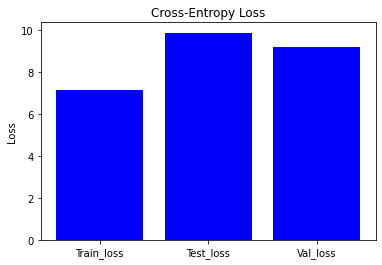

In [ ]:
plt.figure()
plt.bar(['Train_loss', 'Test_loss', 'Val_loss'], [train_loss, test_loss, val_loss], width=0.8, color='b')
plt.title("Cross-Entropy Loss")
plt.ylabel('Loss')
plt.show()